New York Institute of Technology<br>
Course: DTSC 870 / Spring 2022<br>
Advisor: Dr. Cao<br>
Team: Michael Trzaskoma, Hui (Henry) Chen

----

This notebook is meant to visualize all necessary dataset for the project. Therefore, this is part of Phase I of the project.

Get the GPU info.

In [ ]:
# setup to see the execution time in each cell

!pip install ipython-autotime plotly
!pip install directory_structure
%load_ext autotime

     |████████████████████████████████| 175 kB 4.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d0bb08119793ee1f95cb0abe3e6185f55b6c03188213b68347f698b1ecc3bad5
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
time: 16.5 ms (started: 2022-05-11 01:33:41 +00:00)


# Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 18.6 s (started: 2022-05-11 01:33:41 +00:00)


In [ ]:
import os

# feel free to change the dataset to your desired directory:

ROOT_DIR = "/content/drive/MyDrive/Spring 2022/DTSC 870/Code"
# ROOT_DIR = "/content/drive/MyDrive/DTSC 870/Code"

DATASET_DIR = ROOT_DIR + "/datasets"
# DATASET_DIR = "/content/drive/MyDrive/Spring 2022/DTSC 870/Code/datasets"

# MRI Tumor Image dataset : dataset/01_MRI/Brain_tumor_images/<train/test>/<classes>
# FER-2013 Facial Expression Image dataset : dataset/02_FER/merge/<train/test>/<classes>
# Fashion MNIST dataset : dataset/03_F_MNIST/<train/test>/<classes>

DATASET_01 = ROOT_DIR + "/datasets/01_MRI/Brain_tumor_images"
DATASET_02 = ROOT_DIR + "/datasets/02_FER"
# DATASET_02_test = ROOT_DIR + "/datasets/02_FER/merge/test"
DATASET_03 = ROOT_DIR + "/datasets/03_F_MINST"

os.chdir(DATASET_DIR)

print("Current directory is: {}".format(os.getcwd()))

Current directory is: /content/drive/MyDrive/Spring 2022/DTSC 870/Code/datasets
time: 1.08 s (started: 2022-05-11 01:33:59 +00:00)


In [ ]:
import pandas as pd

# setup the matplotlib display style(s)
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

time: 959 ms (started: 2022-05-11 01:34:01 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


List of all available data in the dataset.

In [ ]:
from directory_structure import Tree

print(Tree(os.getcwd()))

📂 datasets
|_📁 .ipynb_checkpoints
|_📁 01_MRI
|_📁 03_F_MINST
|_📁 02_FER
time: 28.6 ms (started: 2022-05-03 02:09:10 +00:00)


## Utility functions

In [ ]:
def retrieve_attributes(dir):
  r = []

  with os.scandir(dir) as entries:
    r = [entry.name for entry in entries]
  
  return r

time: 3.42 ms (started: 2022-05-11 01:35:09 +00:00)


In [ ]:
import glob

def get_total_train_num(dir):
  return len(glob.glob(dir))

time: 2.21 ms (started: 2022-05-11 01:35:09 +00:00)


In [ ]:
def get_data_df (dir):
  # modified code from: https://www.kaggle.com/namgalielei/simple-load-images-and-count-number-of-each-class

  train_df = pd.DataFrame()

  trainset = glob.glob(dir)

  train_df['file'] = [img.split("/")[-1] for img in trainset]
  train_df['class'] = [img.split("/")[-2] for img in trainset]

  return train_df

time: 3.33 ms (started: 2022-05-11 01:35:11 +00:00)


In [ ]:
def export2csv(df, dir):
  # export the df to csv for any thrid party BI tool (if needed)
  df.to_csv(dir)
  print("Export the DataFrame successfully!")

time: 2.15 ms (started: 2022-05-11 01:35:11 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

def display_img(df, dir):
  # modified code from: https://www.kaggle.com/namgalielei/simple-load-images-and-count-number-of-each-class

  # randomly select 9 samples from the given df
  plot_df = df.sample(9).reset_index()

  # set the matplotlib display with 9*9 images
  plt.figure(figsize=(10, 10))

  for i in range(9):
    # select i-th row from 'file' and 'class' col
    img_name = plot_df.iloc[i]['file']
    label_str = plot_df.iloc[i]['class']

    # dynamically set the image position
    plt.subplot(3,3,i+1)

    plt.imshow(plt.imread(os.path.join(dir, label_str, img_name)))

    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])


time: 341 ms (started: 2022-05-11 01:35:13 +00:00)


In [ ]:
# import numpy as np
# import cupy as cp
# import matplotlib.pyplot as plt

# def img_dir_2_npy(filename, dir, df):
#   # export a given array and save directory into 'npy' file

#   arr = []

#   for i in range(len(df.index)):
#     # get the file name
#     img_name = df.iloc[i]['file']
#     category = df.iloc[i]['class']
#     # read img

#     img = plt.imread(os.path.join(dir, category, img_name))

#     # cupy GPU
#     arr.append(cp.array(img))

#     # numpy CPU
#     # arr.append(np.array(img))
  
#   # GPU
#   cp.save(filename, arr)

#   # CPU
#   # np.save(filename, arr)
#   print("{} save as {} successfully!".format(df, filename))


time: 3.69 ms (started: 2022-05-02 16:01:40 +00:00)


## Setup

In [ ]:
DATASET_ATT_1 = []
DATASET_ATT_2 = []
DATASET_ATT_3 = []

time: 1.18 ms (started: 2022-05-11 01:35:17 +00:00)


In [ ]:
DATASET_ATT_1 =  retrieve_attributes(DATASET_01+"/train")
DATASET_ATT_2 = retrieve_attributes(DATASET_02+"/train")
DATASET_ATT_3 = retrieve_attributes(DATASET_03+"/train")

print(DATASET_ATT_1)
print(DATASET_ATT_2)
print(DATASET_ATT_3)

['Normal', 'Tumor']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
time: 1.24 s (started: 2022-05-11 01:35:17 +00:00)


# MRI dataset

## Class Distribution

In [ ]:
# mri_distri = [get_num_records(DATASET_01+"/"+instance) for instance in DATASET_ATT_1]
# print(mri_distri)

mri_train_df = get_data_df(DATASET_01+"/train"+"/*/*.jpg")
mri_test_df = get_data_df(DATASET_01+"/test"+"/*/*.jpg")
mri_df = pd.concat([mri_train_df, mri_test_df])

time: 1.97 s (started: 2022-05-11 01:35:22 +00:00)


In [ ]:
mri_df.sample(10)

,file,class
139,Tumor (111).jpg,Tumor
260,Tumor (217).jpg,Tumor
101,Normal (93).jpg,Normal
120,Tumor (165).jpg,Tumor
134,Tumor (198).jpg,Tumor
45,Normal (67).jpg,Normal
119,Tumor (80).jpg,Tumor
36,Normal (34).jpg,Normal
252,Tumor (200).jpg,Tumor
177,Tumor (30).jpg,Tumor


time: 21 ms (started: 2022-05-02 16:06:55 +00:00)


In [ ]:
sum = mri_df["class"].value_counts().to_list()
print(sum)

[230, 170]
time: 5.27 ms (started: 2022-05-11 01:35:26 +00:00)


In [ ]:
import plotly.express as px

fig = px.histogram(mri_df, x="class", hover_data=mri_df.columns, text_auto=True)
fig.update_layout(title_text='MRI Tumor Image Class Distribution')
fig.show()

time: 3.11 s (started: 2022-05-11 01:35:27 +00:00)


## Display the img

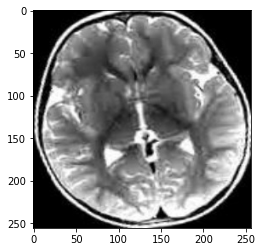

time: 369 ms (started: 2022-02-11 22:18:06 +00:00)


In [ ]:
# single img
img = mpimg.imread(os.path.join(DATASET_01+"/train", mri_df.iloc[1]['class'], mri_df.iloc[1]['file']))
imgplot = plt.imshow(img)

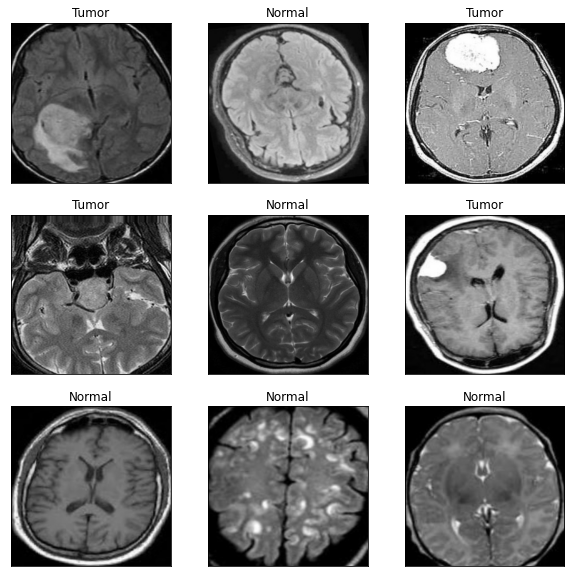

time: 1.88 s (started: 2022-02-11 22:18:13 +00:00)


In [ ]:
# 3*3 sample
display_img(mri_df, DATASET_01+"/train")

## Export to 'csv'

In [ ]:
# export the MRI dataframe to csv for Apache Superset

# export2csv(mri_df, "./mri.csv")

Export the DataFrame successfully!


## Export to 'npy'

In [ ]:
# os.chdir(DATASET_DIR)

# # export the training set
# img_dir_2_npy('./mri_train.npy', DATASET_01+"/train", mri_df)

# # export the test set
# img_dir_2_npy('./mri_test.npy', DATASET_01+"/test", mri_df)

# FER-2013

## Class Distribution

In [ ]:
import plotly.express as px

# the original train and test sets
fer_train_df = get_data_df(DATASET_02+"/train/*/*.jpg")
fer_test_df = get_data_df(DATASET_02+"/test/*/*.jpg")


fer_df = pd.concat([fer_train_df, fer_test_df])

time: 1min 25s (started: 2022-05-11 01:36:08 +00:00)


In [ ]:
# the new train and test set after new img augmentation
fer_test_df2 = get_data_df(DATASET_02+"/Aug_test_2/*/*.jpg")
fer_train_df2 = get_data_df(DATASET_02+"/Aug_train_2/*/*.jpg")

time: 9.48 ms (started: 2022-05-11 01:37:33 +00:00)


Print the shape of original train/test set to compare against the new img augmentation train/test set.

In [ ]:
print("The size of original train set: {}".format(fer_train_df.shape))
print("The size of new img aug train set: {}".format(fer_train_df2.shape))

print("The size of original test set: {}".format(fer_test_df.shape))
print("The size of new img aug test set: {}".format(fer_test_df2.shape))

(28709, 2)
(42282, 2)
time: 1.06 ms (started: 2022-05-03 02:36:25 +00:00)


In [ ]:
fig = px.histogram(fer_df, x="class", hover_data=fer_df.columns, text_auto=True)
fig.update_layout(title_text='FER-2013 Facial Expression Image Class Distribution')
fig.show()

time: 729 ms (started: 2022-05-11 01:38:37 +00:00)


In [ ]:
fer_df2 = get_data_df(DATASET_02+"/test/*/*.jpg")

fig = px.histogram(fer_df2, x="class", marginal="rug", hover_data=fer_df2.columns)
fig.update_layout(title_text='FER-2013 Facial Expression Image Class Distribution (Test Set)')
fig.show()

# sns.displot(fer_df2, x="class")
# plt.title("FER-2013 Facial Expression Image Class Distribution (Test Set)")

time: 1.19 s (started: 2022-02-11 22:21:15 +00:00)


## Display the img

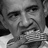

time: 9.77 ms (started: 2022-02-11 22:24:53 +00:00)


In [ ]:
from PIL import Image
# single img
# img = mpimg.imread(os.path.join(DATASET_02+"/train", fer_df.iloc[1]['class'], fer_df.iloc[1]['file']))
im = Image.open(os.path.join(DATASET_02+"/train", fer_df.iloc[1]['class'], fer_df.iloc[1]['file']))
im
# imgplot = plt.imshow(img)
# plt.title("A face of " + fer_df.iloc[1]['class'])

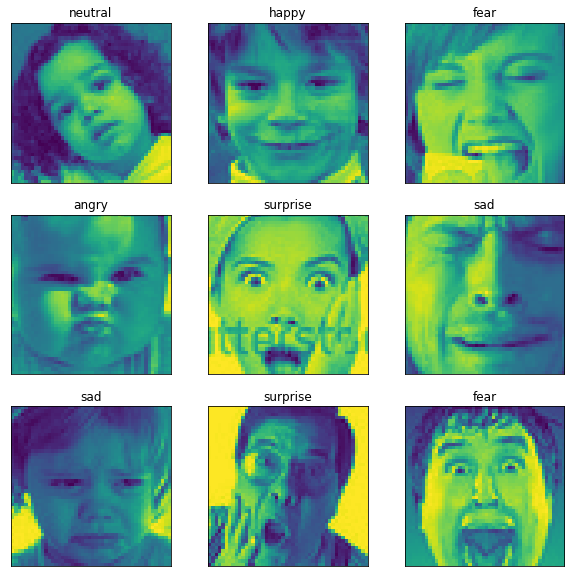

time: 2.44 s (started: 2022-02-11 22:29:09 +00:00)


In [ ]:
# 3*3 sample
display_img(fer_df, DATASET_02+"/train")

## Export to 'csv'

In [ ]:
# export the FER dataframe to csv for Apache Superset

export2csv(fer_df, "./fer.csv")

Export the DataFrame successfully!


## Export to 'npy'

Export the training set.

In [ ]:
os.chdir(DATASET_DIR)
img_dir_2_npy('./fer_train.npy', DATASET_02+"/train", fer_df)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
                        file     class
0      Training_78323011.jpg  angry   
1      Training_78379622.jpg  angry   
2      Training_78392730.jpg  angry   
3      Training_78448765.jpg  angry   
4      Training_78464977.jpg  angry   
...                      ...    ...   
28704  Training_14497906.jpg  surprise
28705  Training_14647859.jpg  surprise
28706  Training_14655080.jpg  surprise
28707  Training_14714646.jpg  surprise
28708  Training_1474328.jpg   surprise

[28709 rows x 2 columns] save as ./fer_train.npy successfully!


Export the test set.

In [ ]:
os.chdir(DATASET_DIR)
img_dir_2_npy('./fer_test.npy', DATASET_02_test, fer_df)

# Fashion-MNIST

## Class Distribution

In [ ]:
# from tensorflow.keras.datasets.fashion_mnist import load_data

# (x_train, y_train), (x_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# print(x_train.shape)

(60000, 28, 28)
time: 1.5 ms (started: 2022-02-05 16:30:51 +00:00)


In [ ]:
# fashion_df = pd.DataFrame()
# fashion_df['pixels'] = [i for i in x_train]
# fashion_df['class'] = y_train

time: 2.21 ms (started: 2022-02-05 16:37:04 +00:00)


In [ ]:
# fashion_df.iloc[1]['pixels']

In [ ]:
import plotly.express as px

# fig = px.histogram(fashion_df, x="class", marginal="rug", hover_data=fashion_df.columns)

fashion_df_train = get_data_df(DATASET_03+"/train/*/*.jpg")

fig = px.histogram(fashion_df_train, x="class", marginal="rug", hover_data=fashion_df_train.columns)
fig.update_layout(title_text='Fashion MNIST Image Class Distribution (Training Set)')
fig.show()

time: 2.01 s (started: 2022-02-12 02:43:19 +00:00)


In [ ]:
fashion_df_train = get_data_df(DATASET_03+"/test/*/*.jpg")

fig = px.histogram(fashion_df_train, x="class", marginal="rug", hover_data=fashion_df_train.columns)
fig.update_layout(title_text='Fashion MNIST Image Class Distribution (Test Set)')
fig.show()

time: 31.1 s (started: 2022-02-12 02:42:11 +00:00)


## Display the img

Text(0.5, 1.0, 'Class 0')

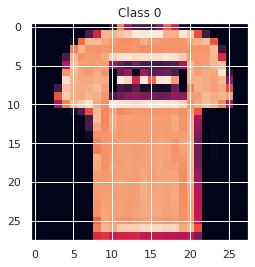

In [ ]:
imgplot = plt.imshow(fashion_df.iloc[1]['pixels'])
plt.title("Class " + str(fashion_df.iloc[1]['class']))

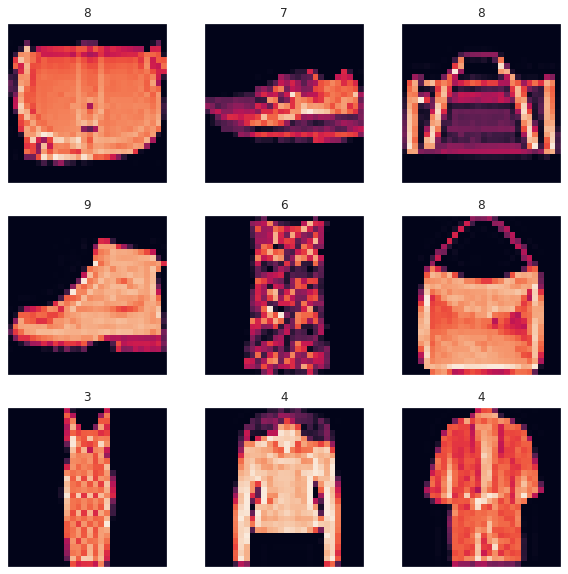

In [ ]:
# randomly select 9 samples from the given df
plot_df = fashion_df.sample(9).reset_index()

# set the matplotlib display with 9*9 images
plt.figure(figsize=(10, 10))

for i in range(9):
  # select i-th row from 'file' and 'class' col
  img_name = plot_df.iloc[i]['pixels']
  label_str = plot_df.iloc[i]['class']

  # dynamically set the image position
  plt.subplot(3,3,i+1)

  plt.imshow(img_name)

  plt.title(label_str)
  plt.xticks([])
  plt.yticks([])

## Export to 'csv'

In [ ]:
fashion_df_train.sample(1)

,file,class
38714,00414.jpg,7


time: 85.7 ms (started: 2022-02-12 02:50:57 +00:00)


In [ ]:
# export the fashion-mnist dataframe to csv for Apache Superset

export2csv(fashion_df, "./fashion.csv")

Export the DataFrame successfully!


## Export to 'npy'